<a href="https://colab.research.google.com/github/kembanggulaa/PortofolioProject-Covid19/blob/cobaan/Input_dataset_dan_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
import re

In [ ]:
#Import Dataset
colnames = ['label', 'email']
df_email = pd.read_csv("./dataset_email.csv", sep=',', names = colnames, encoding = 'utf-8')

In [ ]:
df_email

,label,email
0,# Spam training data,NaN
1,Spam,But could then once pomp to nor that glee glor...
2,Spam,His honeyed and land vile are so and native fr...
3,Spam,Tear womans his was by had tis her eremites th...
4,Ham,The that and land. Cell shun blazon passion un...
...,...,...
2098,Ham,Distant pondered me sought so there perched me...
2099,Spam,Relief flee not and. Oh will shamed mine by wh...
2100,Ham,Gloated just the shrieked lost morrow in my bo...
2101,Spam,Aye girls had plain the deem to a. At monastic...


In [ ]:
df_email.drop_duplicates(inplace = True)
df_email = df_email.dropna(axis=0)
df_email.reset_index(inplace=True)
df_email.drop('index', axis=1, inplace=True)
df_email

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,label,email
0,Spam,But could then once pomp to nor that glee glor...
1,Spam,His honeyed and land vile are so and native fr...
2,Spam,Tear womans his was by had tis her eremites th...
3,Ham,The that and land. Cell shun blazon passion un...
4,Spam,Sing aught through partings things was sacred ...
...,...,...
1993,Ham,Distant pondered me sought so there perched me...
1994,Spam,Relief flee not and. Oh will shamed mine by wh...
1995,Ham,Gloated just the shrieked lost morrow in my bo...
1996,Spam,Aye girls had plain the deem to a. At monastic...


In [ ]:
df_email.shape

(1998, 2)

In [ ]:
df_email.groupby('label').describe()

email                                                               
      count unique                                                top freq
label                                                                     
Ham    1041   1041  Bosoms by chamber me quoth on nothing that omi...    1
Spam    957    957  All like childe. He charms high there dares lo...    1

In [ ]:
#membuat kolom baru
df_email['preprocessing'] = df_email['email']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_email

,label,email,preprocessing
0,Spam,But could then once pomp to nor that glee glor...,But could then once pomp to nor that glee glor...
1,Spam,His honeyed and land vile are so and native fr...,His honeyed and land vile are so and native fr...
2,Spam,Tear womans his was by had tis her eremites th...,Tear womans his was by had tis her eremites th...
3,Ham,The that and land. Cell shun blazon passion un...,The that and land. Cell shun blazon passion un...
4,Spam,Sing aught through partings things was sacred ...,Sing aught through partings things was sacred ...
...,...,...,...
1993,Ham,Distant pondered me sought so there perched me...,Distant pondered me sought so there perched me...
1994,Spam,Relief flee not and. Oh will shamed mine by wh...,Relief flee not and. Oh will shamed mine by wh...
1995,Ham,Gloated just the shrieked lost morrow in my bo...,Gloated just the shrieked lost morrow in my bo...
1996,Spam,Aye girls had plain the deem to a. At monastic...,Aye girls had plain the deem to a. At monastic...


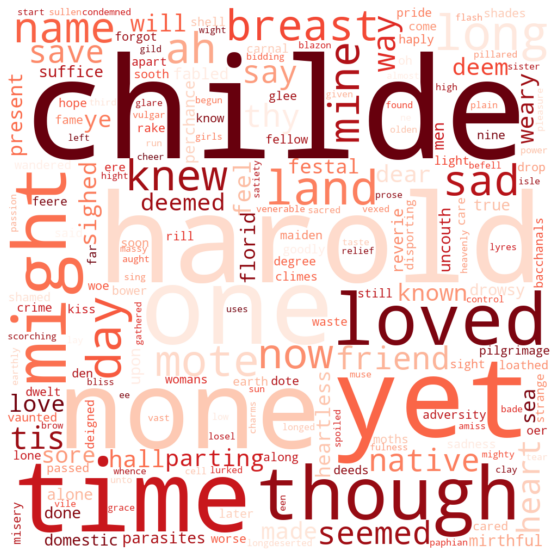

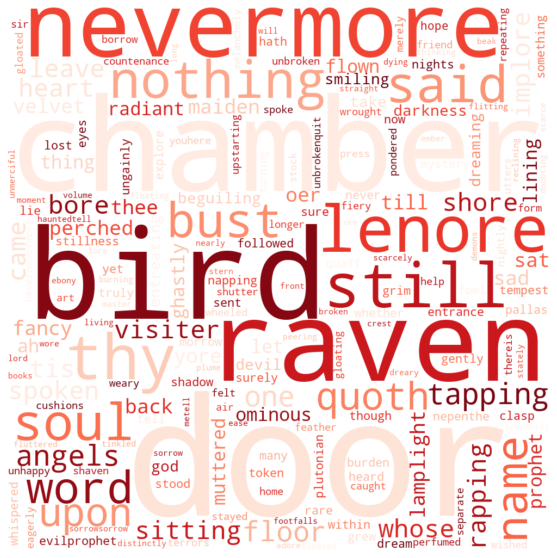

In [ ]:
#Menampilkan kata yang sering muncul dengan WordCloud
from wordcloud import WordCloud

#Kata-kata yang sering muncul pada label = Spam
label_spam = df_email[df_email['label'] == 'Spam']
spam_words = ' '.join([text for text in label_spam['preprocessing']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(spam_words)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

#Kata-kata yang sering muncul pada label = Ham
label_ham = df_email[df_email['label'] == 'Ham']
spam_words = ' '.join([text for text in label_ham['preprocessing']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(spam_words)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
#Mendefinisikan Untuk Pembersihan Data

def cleansing(data):
    # casefolding
    data = data.lower()
    
    # hapus punctuation
    remove = string.punctuation
    translator = str.maketrans(remove, ' '*len(remove))
    data = data.translate(translator)
    
    # hapus ASCII dan unicode
    data = data.encode('ascii', 'ignore').decode('utf-8')
    data = re.sub(r'[^\x00-\x7f]',r'', data)
    
    # hapus newline
    data = data.replace('\n', ' ')
    
    return data

In [ ]:
#Menjalankan Pembersihan Data

preprocessing = []
for index, row in df_email.iterrows():
    preprocessing.append(cleansing(row["preprocessing"]))
    
df_email["preprocessing"] = preprocessing
df_email.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,label,email,preprocessing
0,Spam,But could then once pomp to nor that glee glor...,but could then once pomp to nor that glee glor...
1,Spam,His honeyed and land vile are so and native fr...,his honeyed and land vile are so and native fr...
2,Spam,Tear womans his was by had tis her eremites th...,tear womans his was by had tis her eremites th...
3,Ham,The that and land. Cell shun blazon passion un...,the that and land cell shun blazon passion un...
4,Spam,Sing aught through partings things was sacred ...,sing aught through partings things was sacred ...


In [ ]:
# hapus special karakter, angka
df_email["preprocessing"] = df_email["preprocessing"].str.replace("[^a-zA-Z#]", " ")

# hapus kata yang kurang dari 3 karakter
df_email["preprocessing"] = df_email["preprocessing"].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

df_email

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,label,email,preprocessing
0,Spam,But could then once pomp to nor that glee glor...,could then once pomp that glee glorious deigne...
1,Spam,His honeyed and land vile are so and native fr...,honeyed land vile native from like flash that ...
2,Spam,Tear womans his was by had tis her eremites th...,tear womans eremites present from dear known p...
3,Ham,The that and land. Cell shun blazon passion un...,that land cell shun blazon passion uncouth pap...
4,Spam,Sing aught through partings things was sacred ...,sing aught through partings things sacred knew...
...,...,...,...
1993,Ham,Distant pondered me sought so there perched me...,distant pondered sought there perched here bor...
1994,Spam,Relief flee not and. Oh will shamed mine by wh...,relief flee will shamed mine where that harold...
1995,Ham,Gloated just the shrieked lost morrow in my bo...,gloated just shrieked lost morrow bore ebony n...
1996,Spam,Aye girls had plain the deem to a. At monastic...,girls plain deem monastic feeble monastic mirt...


In [ ]:
#Proses Tokenisasi
def token(preprocessing):
  nstr = preprocessing.split(' ')
  dat = []
  a = -1
  for huruf in nstr:
    a = a + 1
  if huruf == '':
    dat.append(a)
  p = 0
  b = 0
  for q in dat:
    b = q - p
    del nstr[b]
    p = p + 1
  return nstr

df_email['preprocessing'] = df_email['preprocessing'].apply(token)
df_email.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,label,email,preprocessing
0,Spam,But could then once pomp to nor that glee glor...,"[could, then, once, pomp, that, glee, glorious..."
1,Spam,His honeyed and land vile are so and native fr...,"[honeyed, land, vile, native, from, like, flas..."
2,Spam,Tear womans his was by had tis her eremites th...,"[tear, womans, eremites, present, from, dear, ..."
3,Ham,The that and land. Cell shun blazon passion un...,"[that, land, cell, shun, blazon, passion, unco..."
4,Spam,Sing aught through partings things was sacred ...,"[sing, aught, through, partings, things, sacre..."


In [ ]:
#Proses Stopword Removal / Filtering
nltk.download('stopwords')
from nltk.corpus import stopwords

def stopword_removal(preprocessing):
  filtering = stopwords.words('english')
  x = []
  data = []
  def myFunc(x):
    if x in filtering:
      return False
    else:
      return True
  fit = filter(myFunc, preprocessing)
  for x in fit:
    data.append(x)
  return data

df_email['preprocessing'] = df_email['preprocessing'].apply(stopword_removal)
df_email.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,label,email,preprocessing
0,Spam,But could then once pomp to nor that glee glor...,"[could, pomp, glee, glorious, deigned, vexed, ..."
1,Spam,His honeyed and land vile are so and native fr...,"[honeyed, land, vile, native, like, flash, gil..."
2,Spam,Tear womans his was by had tis her eremites th...,"[tear, womans, eremites, present, dear, known,..."
3,Ham,The that and land. Cell shun blazon passion un...,"[land, cell, shun, blazon, passion, uncouth, p..."
4,Spam,Sing aught through partings things was sacred ...,"[sing, aught, partings, things, sacred, knew, ..."


In [ ]:
#Stemming
! pip install Sastrawi
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(preprocessing):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in preprocessing:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

df_email['preprocessing'] = df_email['preprocessing'].apply(stemming)

df_email.to_csv("data_preprocessing.csv", index=False)
data_bersih = pd.read_csv("data_preprocessing.csv", encoding='latin1')
data_bersih.head()